In [13]:
# Setup
import sys
sys.path.append('../src')

from data_loader import PoetryLoader
from analyzer import PoetryAnalyzer
from visualizer import PoetryVisualizer
import pandas as pd
import numpy as np
from collections import Counter

# Reload modules to get latest fixes
import importlib
import feature_extractor
import data_loader
import analyzer as analyzer_module

importlib.reload(feature_extractor)
importlib.reload(data_loader)
importlib.reload(analyzer_module)

# Re-import after reload
from data_loader import PoetryLoader
from analyzer import PoetryAnalyzer
from visualizer import PoetryVisualizer

analyzer = PoetryAnalyzer()
analyzer.loader = PoetryLoader('../data/raw_corpus')
viz = PoetryVisualizer(output_dir='../output')

print("✓ Setup complete - modules reloaded with latest fixes")

✓ Setup complete - modules reloaded with latest fixes


In [14]:
# Load FULL Corpora
print("LOADING COMPLETE CORPORA")
print("="*60)

print("\nLoading ALL Tang Dynasty poems...")
tang_raw = analyzer.loader.load_tang_poems(max_poems=None)
print(f"✓ Loaded {len(tang_raw):,} Tang poems")

print("\nProcessing Tang corpus...")
tang_processed = analyzer.process_corpus(tang_raw)
print("✓ Tang processing complete")

print("\nLoading ALL Song Dynasty ci...")
song_raw = analyzer.loader.load_song_ci(max_poems=None)
print(f"✓ Loaded {len(song_raw):,} Song ci")

print("\nProcessing Song corpus...")
song_processed = analyzer.process_corpus(song_raw)
print("✓ Song processing complete")

print("\n" + "="*60)
print(f"READY FOR ANALYSIS")
print(f"Tang: {len(tang_processed):,} poems")
print(f"Song: {len(song_processed):,} poems")
print(f"Total: {len(tang_processed) + len(song_processed):,} poems")
print("="*60)

LOADING COMPLETE CORPORA

Loading ALL Tang Dynasty poems...
✓ Loaded 57,607 Tang poems

Processing Tang corpus...
✓ Loaded 57,607 Tang poems

Processing Tang corpus...
✓ Tang processing complete

Loading ALL Song Dynasty ci...
✓ Loaded 21,053 Song ci

Processing Song corpus...
✓ Tang processing complete

Loading ALL Song Dynasty ci...
✓ Loaded 21,053 Song ci

Processing Song corpus...
✓ Song processing complete

READY FOR ANALYSIS
Tang: 57,607 poems
Song: 21,053 poems
Total: 78,660 poems
✓ Song processing complete

READY FOR ANALYSIS
Tang: 57,607 poems
Song: 21,053 poems
Total: 78,660 poems


Generating line length comparison visualization...


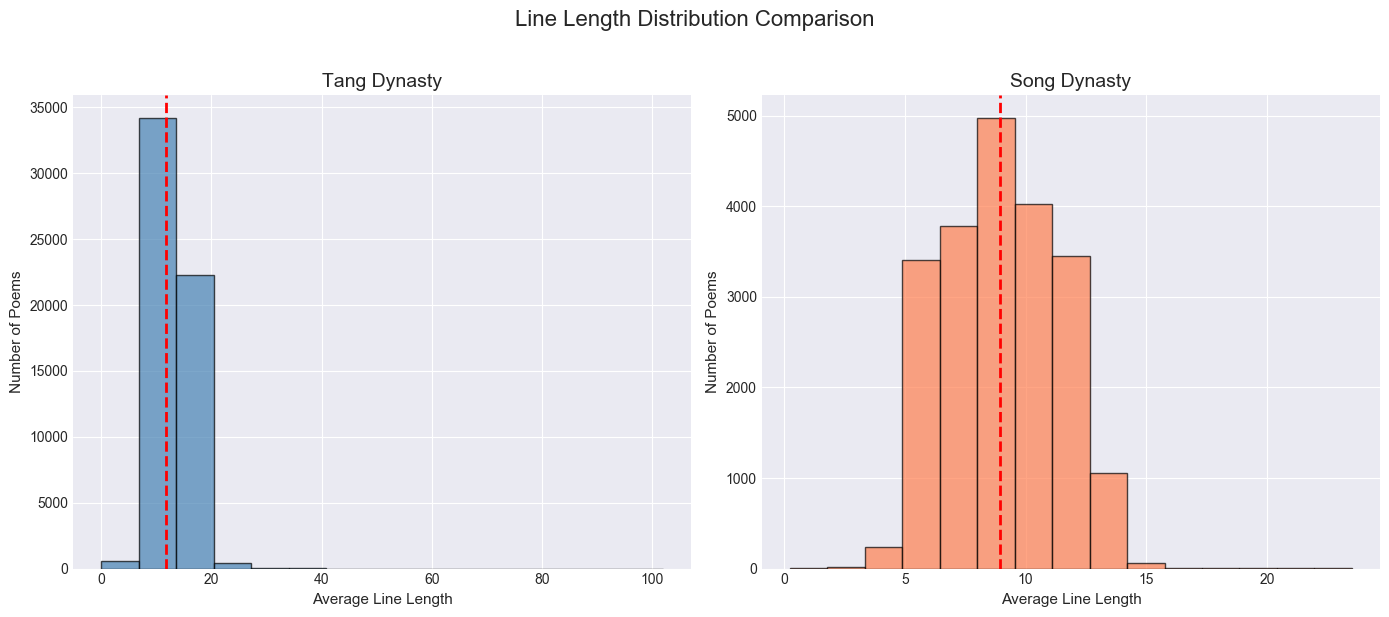

✓ Visualization saved


In [15]:
# Visualize Line Length Distributions
print("Generating line length comparison visualization...")

# Create comparison plot
viz.plot_dynasty_comparison(tang_processed, song_processed, 
                           save_name='tang_song_full_comparison.png')

print("✓ Visualization saved")

In [16]:
# Comprehensive Statistical Comparison
comparison = analyzer.compare_dynasties(tang_processed, song_processed)

print("\n" + "="*70)
print("DYNASTY COMPARISON: TANG POEMS vs SONG CI")
print("="*70)

print(f"\n{'METRIC':<30} {'TANG':>15} {'SONG':>15} {'DIFFERENCE':>10}")
print("-"*70)

# Basic stats
print(f"{'Total poems':<30} {comparison['tang']['total_poems']:>15,} {comparison['song']['total_poems']:>15,}")
print(f"{'Avg lines per poem':<30} {comparison['tang']['avg_line_count']:>15.2f} {comparison['song']['avg_line_count']:>15.2f} {comparison['song']['avg_line_count']-comparison['tang']['avg_line_count']:>+10.2f}")
print(f"{'Avg line length (chars)':<30} {comparison['tang']['avg_line_length']:>15.2f} {comparison['song']['avg_line_length']:>15.2f} {comparison['song']['avg_line_length']-comparison['tang']['avg_line_length']:>+10.2f}")

# Uniformity
tang_uniform_pct = tang_processed['is_uniform_length'].sum() / len(tang_processed) * 100
song_uniform_pct = song_processed['is_uniform_length'].sum() / len(song_processed) * 100
print(f"{'Uniform line length %':<30} {tang_uniform_pct:>14.1f}% {song_uniform_pct:>14.1f}% {song_uniform_pct-tang_uniform_pct:>+9.1f}%")

print("\n" + "="*70)
print("TOP POEM FORMS")
print("="*70)

print("\nTANG DYNASTY:")
tang_forms = tang_processed['poem_form'].value_counts()
for form, count in tang_forms.head(10).items():
    pct = count/len(tang_processed)*100
    print(f"  {form:20s}: {count:7,} ({pct:5.1f}%)")

print("\nSONG DYNASTY:")
song_forms = song_processed['poem_form'].value_counts()
for form, count in song_forms.head(10).items():
    pct = count/len(song_processed)*100
    print(f"  {form:20s}: {count:7,} ({pct:5.1f}%)")


DYNASTY COMPARISON: TANG POEMS vs SONG CI

METRIC                                    TANG            SONG DIFFERENCE
----------------------------------------------------------------------
Total poems                             57,607          21,053
Avg lines per poem                        4.66            7.56      +2.90
Avg line length (chars)                  11.74            8.93      -2.80
Uniform line length %                    85.1%            4.1%     -81.0%

TOP POEM FORMS

TANG DYNASTY:
  other               :  21,892 ( 38.0%)
  wujue               :  14,500 ( 25.2%)
  irregular           :   8,570 ( 14.9%)
  qijue               :   8,000 ( 13.9%)
  wupai               :   2,952 (  5.1%)
  wulu                :   1,181 (  2.1%)
  qipai               :     362 (  0.6%)
  qilu                :     146 (  0.3%)
  unknown             :       4 (  0.0%)

SONG DYNASTY:
  irregular           :  20,185 ( 95.9%)
  other               :     539 (  2.6%)
  wujue               :     1

Generating form distribution comparison...


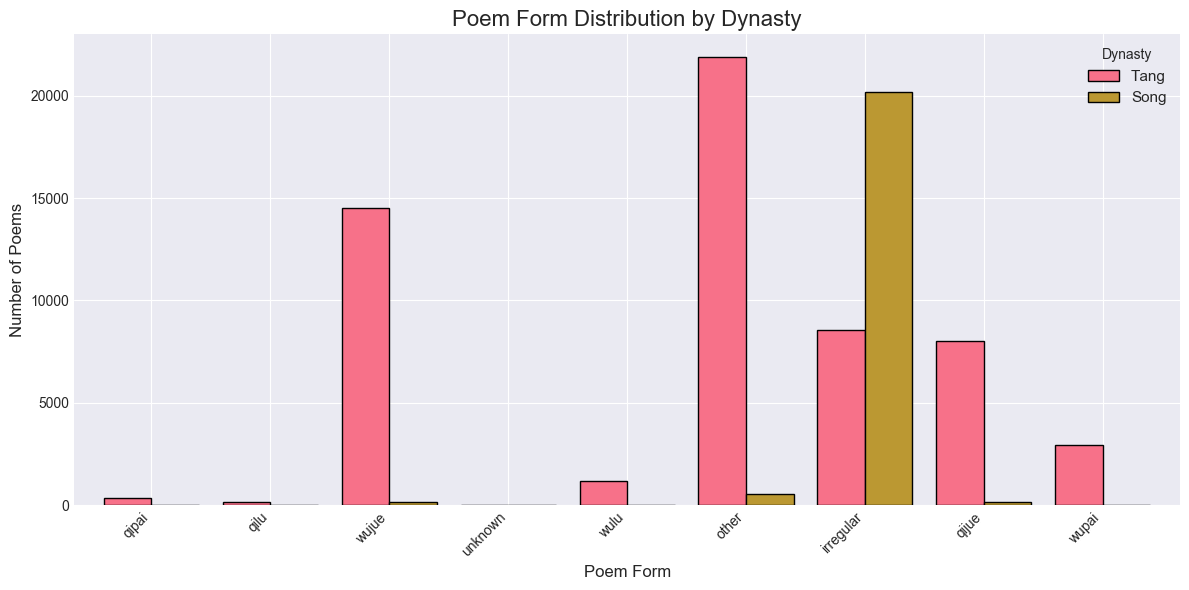

✓ Form comparison saved


In [17]:
# Form Distribution Comparison
print("Generating form distribution comparison...")

viz.plot_form_comparison_grouped(tang_processed, song_processed,
                                save_name='form_comparison_full.png')

print("✓ Form comparison saved")


END CHARACTER (RHYME) ANALYSIS

Tang Dynasty:
  Total unique end characters: 6,063
  Top 15 most common:
    人: 3,496
    時: 2,169
    來: 2,156
    風: 1,966
    春: 1,964
    中: 1,954
    生: 1,845
    歸: 1,837
    聲: 1,708
    行: 1,691
    心: 1,642
    情: 1,524
    年: 1,524
    開: 1,426
    天: 1,382

Song Dynasty:
  Total unique end characters: 4,013
  Top 15 most common:
    去: 1,426
    处: 1,410
    雨: 1,168
    风: 927
    时: 884
    路: 845
    里: 815
    语: 783
    月: 767
    香: 746
    人: 679
    老: 634
    春: 621
    中: 617
    水: 606

Generating Tang Dynasty end character visualization...


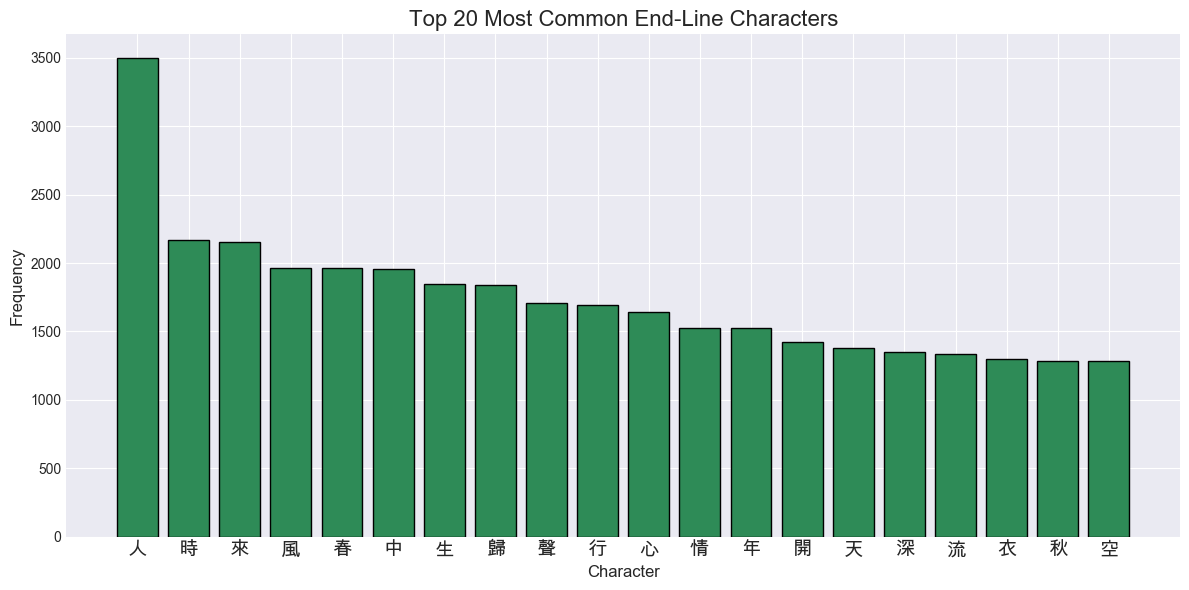

Generating Song Dynasty end character visualization...


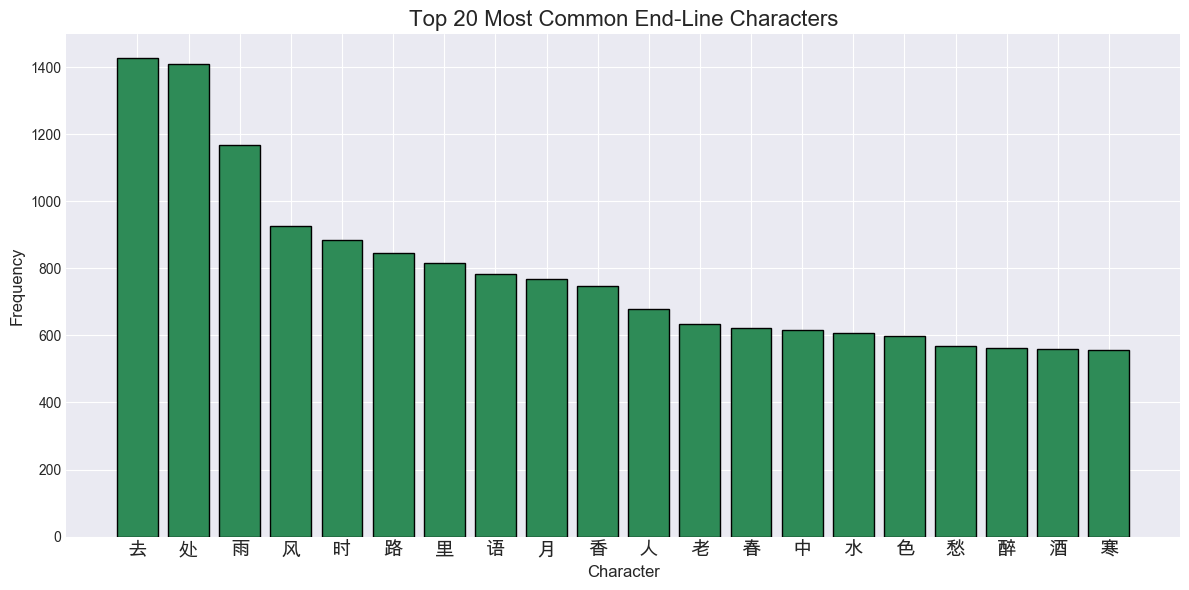

✓ End character visualizations saved


In [18]:
# End Character Analysis Comparison
print("\n" + "="*70)
print("END CHARACTER (RHYME) ANALYSIS")
print("="*70)

# Tang end characters
tang_end_chars = []
for chars in tang_processed['end_characters']:
    tang_end_chars.extend(chars)
tang_counter = Counter(tang_end_chars)

# Song end characters
song_end_chars = []
for chars in song_processed['end_characters']:
    song_end_chars.extend(chars)
song_counter = Counter(song_end_chars)

print(f"\nTang Dynasty:")
print(f"  Total unique end characters: {len(tang_counter):,}")
print(f"  Top 15 most common:")
for char, count in tang_counter.most_common(15):
    print(f"    {char}: {count:,}")

print(f"\nSong Dynasty:")
print(f"  Total unique end characters: {len(song_counter):,}")
print(f"  Top 15 most common:")
for char, count in song_counter.most_common(15):
    print(f"    {char}: {count:,}")

# Plot Tang end characters
print("\nGenerating Tang Dynasty end character visualization...")
viz.plot_end_character_frequency(tang_counter, top_n=20, 
                                save_name='tang_end_chars.png')

# Plot Song end characters
print("Generating Song Dynasty end character visualization...")
viz.plot_end_character_frequency(song_counter, top_n=20,
                                save_name='song_end_chars.png')

print("✓ End character visualizations saved")

In [19]:
# Save Full Comparison Results
print("\nSAVING COMPARISON RESULTS...")
print("="*60)

# Save processed datasets
tang_processed.to_csv('../data/tang_full_comparison.csv', index=False)
song_processed.to_csv('../data/song_full_comparison.csv', index=False)
print(f"✓ Saved processed datasets")

# Save detailed comparison
import json

comparison_summary = {
    'analysis_date': '2025-11-30',
    'corpus_size': {
        'tang': len(tang_processed),
        'song': len(song_processed),
        'total': len(tang_processed) + len(song_processed)
    },
    'tang_statistics': {
        'total_poems': len(tang_processed),
        'avg_lines': float(tang_processed['line_count'].mean()),
        'std_lines': float(tang_processed['line_count'].std()),
        'avg_line_length': float(tang_processed['avg_line_length'].mean()),
        'std_line_length': float(tang_processed['avg_line_length'].std()),
        'uniform_length_pct': float(tang_processed['is_uniform_length'].sum()/len(tang_processed)*100),
        'form_distribution': tang_processed['poem_form'].value_counts().head(15).to_dict(),
        'total_characters': int(tang_processed['total_characters'].sum()),
        'unique_end_chars': len(tang_counter),
        'top_end_chars': dict(tang_counter.most_common(20))
    },
    'song_statistics': {
        'total_poems': len(song_processed),
        'avg_lines': float(song_processed['line_count'].mean()),
        'std_lines': float(song_processed['line_count'].std()),
        'avg_line_length': float(song_processed['avg_line_length'].mean()),
        'std_line_length': float(song_processed['avg_line_length'].std()),
        'uniform_length_pct': float(song_processed['is_uniform_length'].sum()/len(song_processed)*100),
        'form_distribution': song_processed['poem_form'].value_counts().head(15).to_dict(),
        'total_characters': int(song_processed['total_characters'].sum()),
        'unique_end_chars': len(song_counter),
        'top_end_chars': dict(song_counter.most_common(20))
    },
    'key_differences': {
        'avg_lines_diff': float(song_processed['line_count'].mean() - tang_processed['line_count'].mean()),
        'avg_line_length_diff': float(song_processed['avg_line_length'].mean() - tang_processed['avg_line_length'].mean()),
        'uniformity_diff': float((song_processed['is_uniform_length'].sum()/len(song_processed) - 
                                 tang_processed['is_uniform_length'].sum()/len(tang_processed)) * 100)
    }
}

with open('../output/dynasty_comparison_full.json', 'w', encoding='utf-8') as f:
    json.dump(comparison_summary, f, ensure_ascii=False, indent=2)

print("✓ Saved comparison summary to ../output/dynasty_comparison_full.json")
print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


SAVING COMPARISON RESULTS...
✓ Saved processed datasets
✓ Saved comparison summary to ../output/dynasty_comparison_full.json

ANALYSIS COMPLETE
✓ Saved processed datasets
✓ Saved comparison summary to ../output/dynasty_comparison_full.json

ANALYSIS COMPLETE
